In [1]:
from DataPaths import Paths
from DatasetReader import DatasetReader
from MeanMaker import MeanMaker
from DataFramer import DataFramer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mm = MeanMaker()
dr = DatasetReader()
framer = DataFramer(Paths.processed_image_path_v3, Paths.full_year_pickle_path_v3)
common_lams = pd.read_pickle("common_lams_v2.pkl")

In [5]:
# Modify these parameters!
selected_years = [2016, 2017, 2020, 2021]
selected_feature = "CarCount"

In [6]:
for year in selected_years:
  framer.pickle_year_with_common_lams(year, selected_feature, common_lams)

In [9]:
with_common = list(filter(lambda path: "common" in path, dr.read_directories(Paths.full_year_pickle_path_v3).full_file_paths))
with_common

['YOUR_PATH\\data\\full_year_pickles_v3\\full_year_commonlams_2016_CarCount.pkl',
 'YOUR_PATH\\data\\full_year_pickles_v3\\full_year_commonlams_2017_CarCount.pkl',
 'YOUR_PATH\\data\\full_year_pickles_v3\\full_year_commonlams_2020_CarCount.pkl',
 'YOUR_PATH\\data\\full_year_pickles_v3\\full_year_commonlams_2021_CarCount.pkl']

In [10]:
def create_means_from_monday(path, year):
  full_year = dr.read_pickle(path)
  means = mm.create_means_from_monday(1, 2, year, 3, full_year, "CarCount")
  means.to_pickle(f"{Paths.mean_pickles_v2}\\means_commonlams_{year}_from_1st_monday_february_3_weeks.pkl")

In [11]:
years = [2016,2017,2020,2021]

for i in range(len(with_common)):
  create_means_from_monday(with_common[i], years[i])

[32, 33, 34, 35, 36, 37, 38]
[39, 40, 41, 42, 43, 44, 45]
[46, 47, 48, 49, 50, 51, 52]
[37, 38, 39, 40, 41, 42, 43]
[44, 45, 46, 47, 48, 49, 50]
[51, 52, 53, 54, 55, 56, 57]
[34, 35, 36, 37, 38, 39, 40]
[41, 42, 43, 44, 45, 46, 47]
[48, 49, 50, 51, 52, 53, 54]
[32, 33, 34, 35, 36, 37, 38]
[39, 40, 41, 42, 43, 44, 45]
[46, 47, 48, 49, 50, 51, 52]


In [12]:
means_commonlams = list(filter(lambda path: "common" in path, dr.read_directories(Paths.mean_pickles_v2).full_file_paths))

In [21]:
means_2016 = pd.read_pickle(means_commonlams[0])
means_2017 = pd.read_pickle(means_commonlams[1])

In [22]:
lam102_2016 = means_2016[means_2016["lamId"]== 1005]
lam102_2016

,lamId,year,startDay,weeksInMean,direction,CarCount
518,1005,2016,32,3,1,"[0.3333333333333333, 0.0, 0.0, 0.0, 0.33333333..."
519,1005,2016,32,3,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333..."


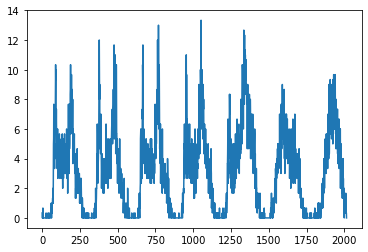

In [23]:
plt.plot(lam102_2016.iloc[0]["CarCount"])

In [24]:
lam102_means_2017 = means_2017[means_2017["lamId"]== 1005]

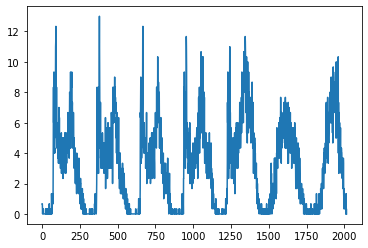

In [26]:
plt.plot(lam102_means_2017["CarCount"].values[0])

In [27]:
lam102_means_2017["CarCount"]

592    [0.6666666666666666, 0.6666666666666666, 0.333...
593    [0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, ...
Name: CarCount, dtype: object